<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/HW_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87a_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D0%B8%D0%BF%D0%B0_%D1%81%D1%82%D0%B5%D0%BA%D0%BE%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install matplotlib-venn

In [6]:
from sklearn.utils import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
# sklearn.metrics.ConfusionMatrixDisplay
# from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('/content/drive/MyDrive/glass.csv')

data.sample(6)

Mounted at /content/drive


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
120,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
148,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.00,0.10,3
140,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
12,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1


In [8]:
# Check for missing values
print(data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [9]:
features = data.iloc[:,np.r_[0:9]]
labels = data.iloc[:,9]

In [10]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [11]:
labels.unique()

array([1, 2, 3, 5, 6, 7])

In [12]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [13]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=20, test_size=0.3)

In [15]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(data['Type']), y=data['Type'])
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 0.5095238095238095,
 1: 0.4692982456140351,
 2: 2.0980392156862746,
 3: 2.7435897435897436,
 4: 3.962962962962963,
 5: 1.2298850574712643}

In [16]:
old_keys = [0,1,2,3,4,5]
new_keys = [1,2,3,5,6,7]
weights_final = dict(zip(new_keys, list(class_weights_dict.values()))) 
#class_weights_dict[new_keys] = class_weights_dict.pop(old_keys)
#class_weights_dict.keys()
weights_final

{1: 0.5095238095238095,
 2: 0.4692982456140351,
 3: 2.0980392156862746,
 5: 2.7435897435897436,
 6: 3.962962962962963,
 7: 1.2298850574712643}

In [17]:
rf_classifier = RandomForestClassifier()

param_grid = [
    {'n_estimators': [10, 20, 30, 50, 70, 80, 100, 120, 150, 180, 200, 220, 280, 320], 
     'max_features': ['auto','sqrt','log2'], 
      'oob_score':[True, False], 'bootstrap':[True, False], 
     'class_weight':[None, 'balanced'], 'criterion':['gini', 'entropy']}
] # a list of dictionaries

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
840 fits failed out of a total of 3360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
840 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'class_weight': [None, 'balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 50, 70, 80, 100, 120,
                                           150, 180, 200, 220, 280, 320],
                          'oob_score': [True, False]}],
             return_train_score=True)

In [18]:
grid_search.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 80,
 'oob_score': False}

In [19]:
grid_search.best_score_

0.8114942528735632

____

In [20]:
best_param_classifier_1 = RandomForestClassifier(bootstrap=False, n_estimators=150, max_features='log2', 
                                               oob_score=False, class_weight= 'balanced',
                                                criterion='entropy')
best_param_classifier_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_features='log2',
                       n_estimators=150)

In [21]:
rf_prediction_test = best_param_classifier_1.predict(X_test)
accuracy_score(y_test, rf_prediction_test)

0.7076923076923077

In [22]:
rf_prediction_train = best_param_classifier_1.predict(X_train)
accuracy_score(y_train, rf_prediction_train)

1.0

In [23]:
precision_score(y_test, rf_prediction_test, average=None)

array([0.57142857, 0.81481481, 0.        , 0.75      , 0.66666667,
       0.875     ])

In [24]:
recall_score(y_test, rf_prediction_test, average=None)

array([0.8       , 0.81481481, 0.        , 0.75      , 1.        ,
       0.77777778])

In [25]:
f1_score(y_test, rf_prediction_test, average=None) # indicates how well the model performs on minority class

array([0.66666667, 0.81481481, 0.        , 0.75      , 0.8       ,
       0.82352941])

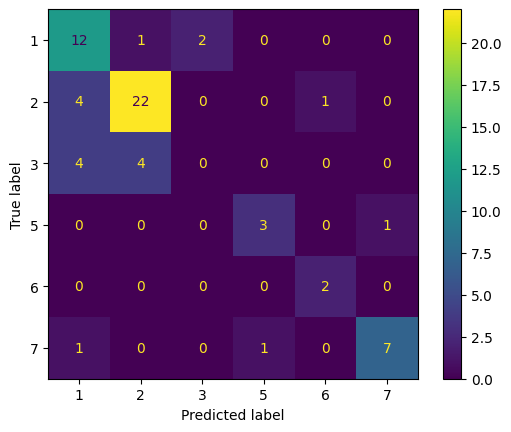

In [28]:
clf = best_param_classifier_1
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)

plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_prediction_test))

              precision    recall  f1-score   support

           1       0.57      0.80      0.67        15
           2       0.81      0.81      0.81        27
           3       0.00      0.00      0.00         8
           5       0.75      0.75      0.75         4
           6       0.67      1.00      0.80         2
           7       0.88      0.78      0.82         9

    accuracy                           0.71        65
   macro avg       0.61      0.69      0.64        65
weighted avg       0.66      0.71      0.68        65



_____